# Enet Random Samples
- Test if random sampling for training Emergenets affects qdistance between two strains
- In our analysis, we used 3000 strains to train Enet when there are more than 3000 for a season
- Use sequences from:
    - North H1N1 2015-2016 through 2019-2020 flu seasons
    - North H3N2 2015-2016 through 2019-2020 flu seasons
- Train 100 Enets for each of H1N1 HA, H3N2 HA, using different random states for each

In [5]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')

## Create Enet Models
- Train 100 Enets from the same data using different random states for each
- Do this for both H1N1 and H3N2 datasets for HA segment

### Running Processes

Computations are done in:
- `enet_random_sampling_train.py`
- `run_enet_random_sampling_train.sh`

To run, navigate to terminal and do

`chmod ugo+rwx run_enet_random_sampling_train.sh
./run_enet_random_sampling_train.sh`

## Data Analysis
- For each season and subtype, do the following:
    - Cluster the distance matrix and sample 10 pairs of strains randomly from each of the two largest clusters
    - For each of the 100 Enets, compute the qdistance between the two strains
    - Compute the intercluster distance matrix (distance matrix with the strains from the two largest clusters on either axis)
    
### Running Processes

Computations are done in:
- `enet_random_sampling_test.py`
- `run_enet_random_sampling_test.sh`
- `intercluster_distance_matrices.py`
- `run_intercluster_distance_matrices.sh`

To run, navigate to terminal and do

`chmod ugo+rwx run_enet_random_sampling_test.sh
./run_enet_random_sampling_test.sh`

`chmod ugo+rwx run_intercluster_distance_matrices.sh
./run_intercluster_distance_matrices.sh`

In [2]:
FILES = ['h1n1_18_19', 'h1n1_19_20', 'h3n2_18_19', 'h3n2_19_20']

for i in range(4):
    DATA_DIR = 'results/' + FILES[i] + '/' + FILES[i]
    inter_cluster = np.load(DATA_DIR + '_intercluster.npy')
    print('----------')
    print(FILES[i].upper())
    print('    Mean:', round(np.mean(inter_cluster), 5))
    print('    Std:', round(np.std(inter_cluster), 5))
    print('    Min:', round(np.min(inter_cluster), 5))
    print('    Med:', round(np.median(inter_cluster), 5))
    print('    Max:', round(np.max(inter_cluster), 5))

----------
H1N1_18_19
    Mean: 0.005
    Std: 0.00034
    Min: 0.00381
    Med: 0.00493
    Max: 0.00743
----------
H1N1_19_20
    Mean: 0.00599
    Std: 0.00116
    Min: 0.0
    Med: 0.00587
    Max: 0.01153
----------
H3N2_18_19
    Mean: 0.00564
    Std: 0.00106
    Min: 9e-05
    Med: 0.0056
    Max: 0.01463
----------
H3N2_19_20
    Mean: 0.01592
    Std: 0.00048
    Min: 0.01169
    Med: 0.01585
    Max: 0.02208


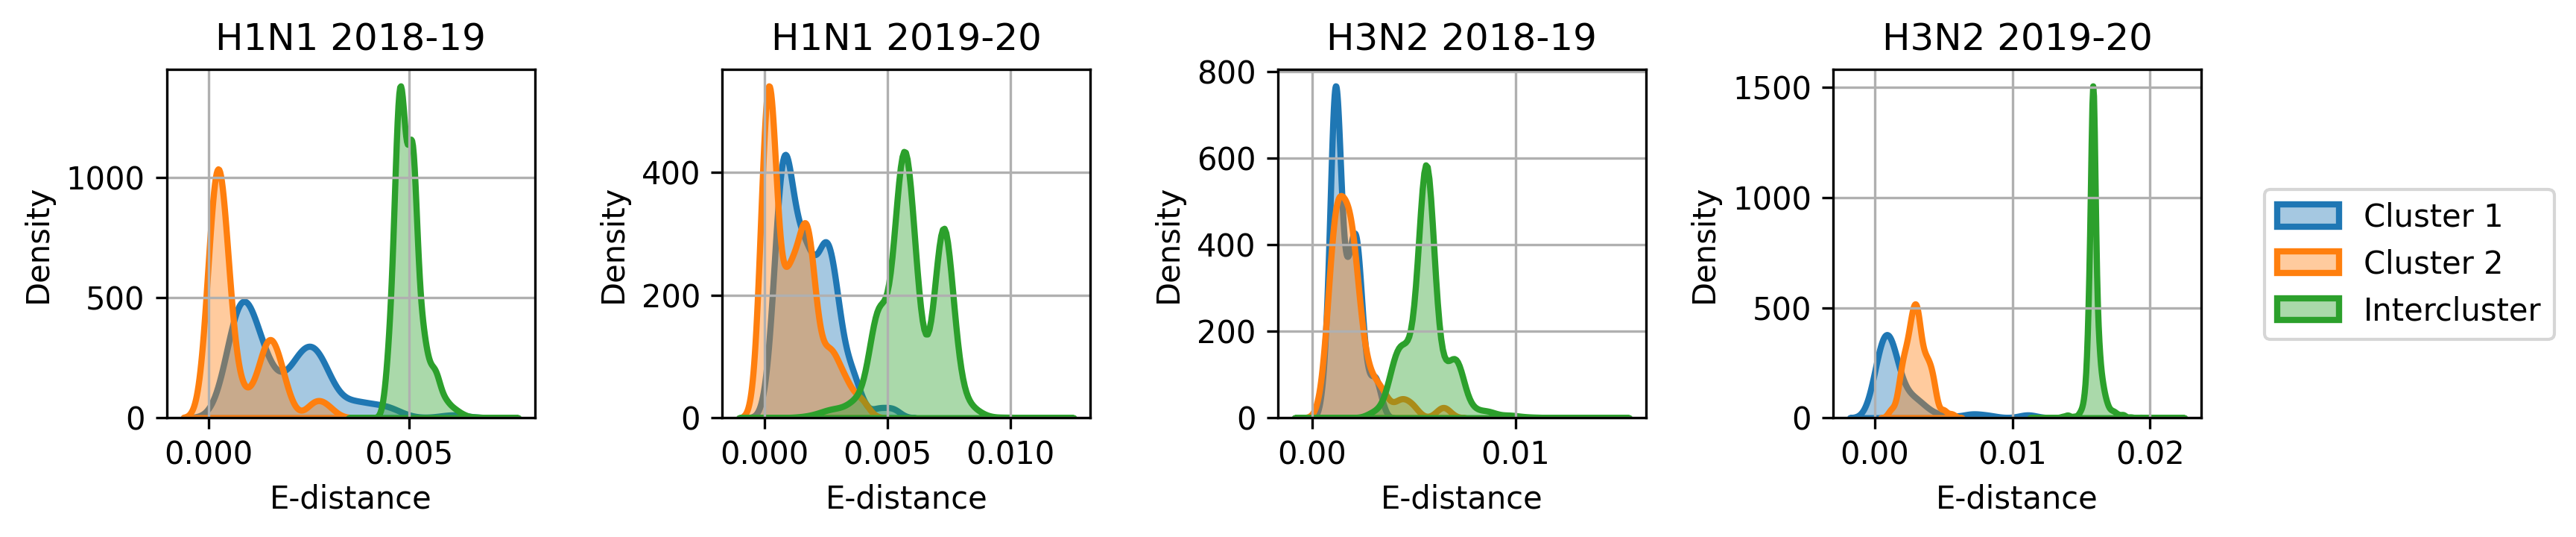

In [20]:
plt.figure(figsize=(12, 2.5))

plt.subplot(1, 4, 1)  
DATA_DIR = 'results/' + FILES[0] + '/' + FILES[0]
inter_cluster = np.load(DATA_DIR + '_intercluster.npy')
data = pd.read_csv(DATA_DIR + '_cluster1_data.csv').T[0][1:]
data1 = np.stack([data for _ in range(len(inter_cluster)//100)], axis=0).flatten().astype(float)
data = pd.read_csv(DATA_DIR + '_cluster2_data.csv').T[3][1:]
data2 = np.stack([data for _ in range(len(inter_cluster)//100)], axis=0).flatten().astype(float)
sns.kdeplot(data1, shade=True, label='Cluster 1', alpha=0.4, linewidth=2, bw=0.3)
sns.kdeplot(data2, shade=True, label='Cluster 2', alpha=0.4, linewidth=2, bw=0.3)
sns.kdeplot(inter_cluster, shade=True, label='Intercluster', alpha=0.4, linewidth=2, bw=0.3)
name = FILES[0][:4].upper() + ' 20' + FILES[0][5:7] + '-' + FILES[0][8:10]
plt.xlabel('E-distance')
plt.title(name)
plt.grid()

plt.subplot(1, 4, 2)  
DATA_DIR = 'results/' + FILES[1] + '/' + FILES[1]
inter_cluster = np.load(DATA_DIR + '_intercluster.npy')
data = pd.read_csv(DATA_DIR + '_cluster1_data.csv').T[0][1:]
data1 = np.stack([data for _ in range(len(inter_cluster)//100)], axis=0).flatten().astype(float)
data = pd.read_csv(DATA_DIR + '_cluster2_data.csv').T[3][1:]
data2 = np.stack([data for _ in range(len(inter_cluster)//100)], axis=0).flatten().astype(float)
sns.kdeplot(data1, shade=True, label='Cluster 1', alpha=0.4, linewidth=2, bw=0.3)
sns.kdeplot(data2, shade=True, label='Cluster 2', alpha=0.4, linewidth=2, bw=0.3)
sns.kdeplot(inter_cluster, shade=True, label='Intercluster', alpha=0.4, linewidth=2, bw=0.3)
name = FILES[1][:4].upper() + ' 20' + FILES[1][5:7] + '-' + FILES[1][8:10]
plt.xlabel('E-distance')
plt.title(name)
plt.grid()

plt.subplot(1, 4, 3)  
DATA_DIR = 'results/' + FILES[2] + '/' + FILES[2]
inter_cluster = np.load(DATA_DIR + '_intercluster.npy')
data = pd.read_csv(DATA_DIR + '_cluster1_data.csv').T[6][1:]
data1 = np.stack([data for _ in range(len(inter_cluster)//100)], axis=0).flatten().astype(float)
data = pd.read_csv(DATA_DIR + '_cluster2_data.csv').T[4][1:]
data2 = np.stack([data for _ in range(len(inter_cluster)//100)], axis=0).flatten().astype(float)
sns.kdeplot(data1, shade=True, label='Cluster 1', alpha=0.4, linewidth=2, bw=0.3)
sns.kdeplot(data2, shade=True, label='Cluster 2', alpha=0.4, linewidth=2, bw=0.3)
sns.kdeplot(inter_cluster, shade=True, label='Intercluster', alpha=0.4, linewidth=2, bw=0.3)
name = FILES[2][:4].upper() + ' 20' + FILES[2][5:7] + '-' + FILES[2][8:10]
plt.xlabel('E-distance')
plt.title(name)
plt.grid()

plt.subplot(1, 4, 4)  
DATA_DIR = 'results/' + FILES[3] + '/' + FILES[3]
inter_cluster = np.load(DATA_DIR + '_intercluster.npy')
data = pd.read_csv(DATA_DIR + '_cluster1_data.csv').T[0][1:]
data1 = np.stack([data for _ in range(len(inter_cluster)//100)], axis=0).flatten().astype(float)
data = pd.read_csv(DATA_DIR + '_cluster2_data.csv').T[5][1:]
data2 = np.stack([data for _ in range(len(inter_cluster)//100)], axis=0).flatten().astype(float)
sns.kdeplot(data1, shade=True, label='Cluster 1', alpha=0.4, linewidth=2, bw=0.3)
sns.kdeplot(data2, shade=True, label='Cluster 2', alpha=0.4, linewidth=2, bw=0.3)
sns.kdeplot(inter_cluster, shade=True, label='Intercluster', alpha=0.4, linewidth=2, bw=0.3)
name = FILES[3][:4].upper() + ' 20' + FILES[3][5:7] + '-' + FILES[3][8:10]
plt.xlabel('E-distance')
plt.title(name)
plt.grid()

plt.legend(bbox_to_anchor=(2, 0.7))
plt.tight_layout()
plt.savefig('../tables/random_sampling.png',bbox_inches='tight',transparent=True);